In [155]:
from bin.IOUtilities import IOUtilities
from bin.RawDataUtilities import RawDataUtilities
from bin.LogisticRegression import LogisticRegression
from bin.VisualizatinonUtilities import VisualizationUtilities

import scipy.io as sio
import numpy as np

In [156]:
def load_data(path, transpose = True):
     data = sio.loadmat(path)
     
     y_train_array = data.get('y')
     y_train_array = y_train_array.reshape(y_train_array.shape[0])
     
     x_train_array = data.get('X')
     if transpose:
         x_train_list = np.asarray([im.reshape((20, 20)).T for im in x_train_array]) # [] - list
     else:
         x_train_list = np.asarray([im.reshape(400) for im in x_train_array])
     
     return x_train_list, y_train_array


In [157]:
x_raw, y_raw = load_data('../data/ex3data1.mat')

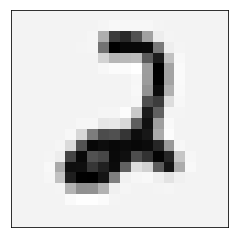

In [158]:
size = (20, 20)
VisualizationUtilities.plot_mat(x_raw[np.random.randint(0, 5000)], size)

In [159]:
x_raw, y_raw = load_data('../data/ex3data1.mat', False)

In [160]:
opt_theta = []
for k in range(1, 11):
    logistic_regression = LogisticRegression(degree=1, la=1)
    y_i = np.array([1 if label == k else 0 for label in y_raw])
    y_i = np.reshape(y_i, (x_raw.shape[0], 1))
    opt_theta.append(logistic_regression.fit(x_raw, y_i).theta)

/Users/shawn/Files/Project/Machine Learning in Python/bin/LogisticRegression.py:79: RuntimeWarning: divide by zero encountered in log
  cost = (np.dot(-y_training_mat.T, np.log(sig)) - np.dot(1 - y_training_mat.T, np.log(1 - sig))) / m
/Users/shawn/Files/Project/Machine Learning in Python/bin/LogisticRegression.py:79: RuntimeWarning: divide by zero encountered in log
  cost = (np.dot(-y_training_mat.T, np.log(sig)) - np.dot(1 - y_training_mat.T, np.log(1 - sig))) / m
/Users/shawn/Files/Project/Machine Learning in Python/bin/LogisticRegression.py:79: RuntimeWarning: divide by zero encountered in log
  cost = (np.dot(-y_training_mat.T, np.log(sig)) - np.dot(1 - y_training_mat.T, np.log(1 - sig))) / m
/Users/shawn/Files/Project/Machine Learning in Python/bin/LogisticRegression.py:79: RuntimeWarning: divide by zero encountered in log
  cost = (np.dot(-y_training_mat.T, np.log(sig)) - np.dot(1 - y_training_mat.T, np.log(1 - sig))) / m
/Users/shawn/Files/Project/Machine Learning in Python/bi

In [161]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [162]:
def predict_all(X, all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]
    
    # same as before, insert ones to match the shape
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    # convert to matrices
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    
    # compute the class probability for each class on each training instance
    h = sigmoid(X * all_theta.T)
    
    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1)
    
    # because our array was zero-indexed we need to add one for the true label prediction
    h_argmax = h_argmax + 1
    
    return h_argmax

In [163]:
data = sio.loadmat('ex3data1.mat')
y_pred = predict_all(data['X'], np.asmatrix(opt_theta))
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, data['y'])]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 97.56%
